In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df_titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv")
# df_titanic.tail()
df_titanic.tail(2).T # feature 확인

,889,890
PassengerId,890,891
Survived,1,0
Pclass,1,3
Name,"Behr, Mr. Karl Howell","Dooley, Mr. Patrick"
Sex,male,male
Age,26.0,32.0
SibSp,0,0
Parch,0,0
Ticket,111369,370376
Fare,30.0,7.75


In [ ]:
df_titanic.shape # 행=>데이터 개수 / 열=>칼럼(feature) 개수

(891, 12)

In [6]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_titanic.info() # data type, non-null값 개수

# 1. null값 어떻게 처리할 것인지?
# 2. feature 처리 방향 (범주형 데이터처리, 숫자로 치환(0/1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 숫자형 데이터의 경우, 기초통계 (개수, 평균, 표준편차, 최솟값, 25%, 중앙값, 75%, 최대값)
df_titanic.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df_titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
df_titanic.describe(include='O') 

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


생존율과 객실등급 간의 상관관계를 분석해보세요.

In [ ]:
# EDA 시 column 정리하는 방법 가이드 -> column리스트 print찍고 목적에 맞게 변수 구분하기
print(list(df_titanic.columns))

['Survived', # target Y
 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked' # 범주형
 'Age', 'Fare', # 연속형
]

target_column = 'Survived'

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [12]:
col = list(df_titanic)
col.pop(0)

'PassengerId'

In [13]:
col.insert(0, col.pop())

In [14]:
df_titanic[col[:3]]

,Embarked,Survived,Pclass
0,S,0,3
1,C,1,1
2,S,1,3
3,S,1,1
4,S,0,3
...,...,...,...
886,S,0,2
887,S,1,1
888,S,0,3
889,C,1,1


In [15]:
df_titanic[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
# df_titanic['Survived', 'Pclass'].corr()
df_titanic[['Survived', 'Pclass']].corr()

,Survived,Pclass
Survived,1.000000,-0.338481
Pclass,-0.338481,1.000000


생존율과 다음 컬럼값들 간의 상관관계를 분석해보세요.
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

상관관계 > Table로 표현해보세요.


In [17]:
df_titanic[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()[['Survived']]

,Survived
Survived,1.000000
Pclass,-0.338481
Age,-0.077221
SibSp,-0.035322
Parch,0.081629
Fare,0.257307


상관관계 > heatmap으로 표현해보세요.

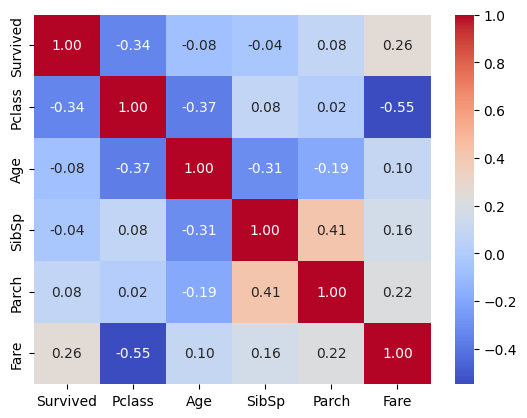

In [18]:
g = sns.heatmap(df_titanic[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(),
            cmap='coolwarm', annot=True, fmt='.2f')

각각을 bar plot으로 시각화해보세요.

검은색 bar는 오차막대(error bar) 이며 신뢰구간(confidence interval) 95%

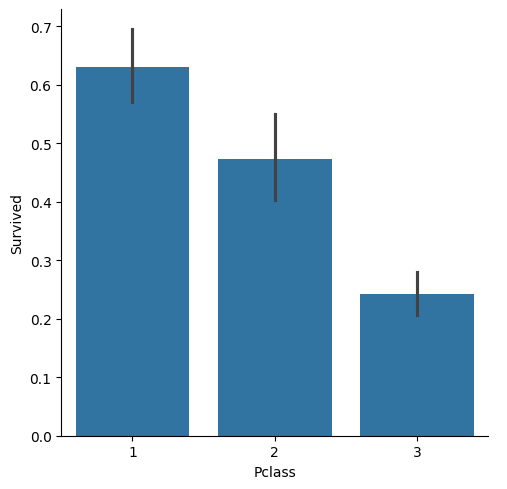

In [19]:
g = sns.catplot(x='Pclass', y='Survived', data=df_titanic, kind='bar')

In [22]:
my_palette = sns.palettes.SEABORN_PALETTES['pastel']

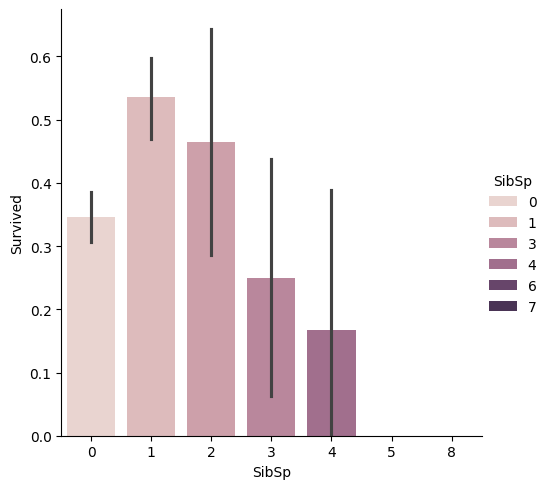

In [ ]:
g = sns.catplot(x='SibSp', y='Survived', data=df_titanic, kind='bar', 
                hue='SibSp', # 색상주기
                #palette=my_palette[:len(df_titanic['SibSp'].unique())]
                )

C:\Users\USER\AppData\Local\Temp\ipykernel_1552\2444593339.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='Parch', y='Survived', data=df_titanic, kind='bar',


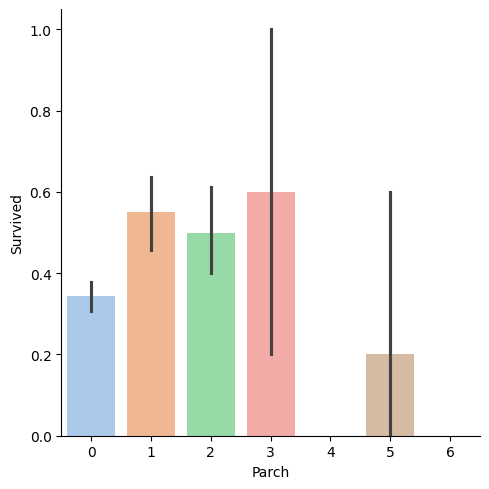

In [25]:
g = sns.catplot(x='Parch', y='Survived', data=df_titanic, kind='bar',
                palette=my_palette[:len(df_titanic['SibSp'].unique())])

생존자와 사망자 간의 각 나이 분포도를 히스토그램으로 시각화해보세요.

Survived
0    [[Axes(0.125,0.11;0.336957x0.77), Axes(0.56304...
1    [[Axes(0.125,0.11;0.336957x0.77), Axes(0.56304...
dtype: object

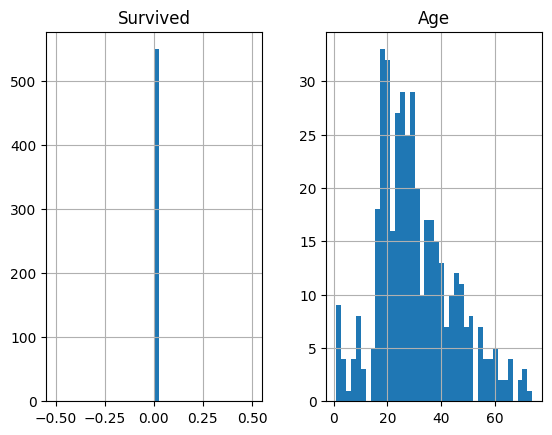

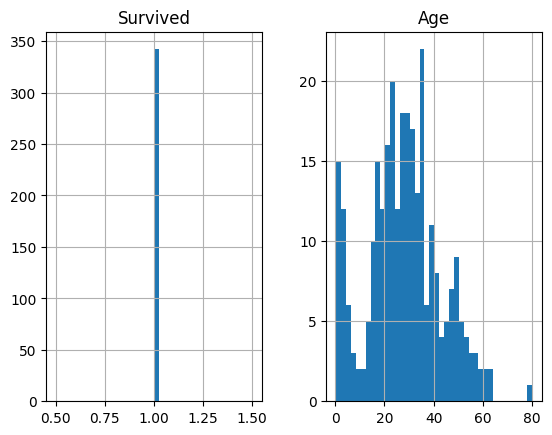

In [26]:
df_titanic[['Survived', 'Age']].groupby(['Survived']).hist(bins=40)

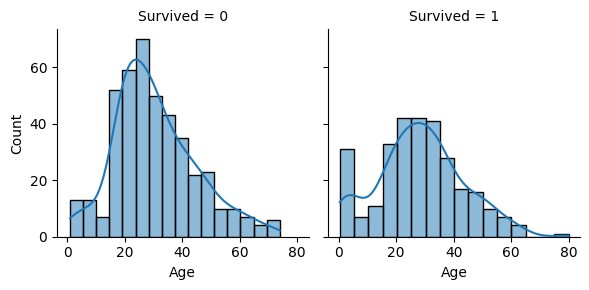

In [27]:
# sns subplot 그리기 (col 기준) (row 기준)
g = sns.FacetGrid(df_titanic, col='Survived')
g = g.map(sns.histplot, 'Age', kde=True) # kde=True, kernel density estimate to smooth the distribution and show on the plot as (one or more) line(s)

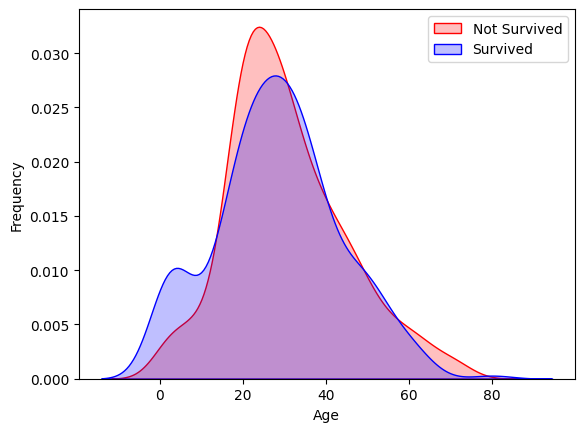

In [ ]:
# kde plot
g = sns.kdeplot(
    df_titanic["Age"][(df_titanic["Survived"] == 0) & (df_titanic["Age"].notnull())], 
    color="Red", fill= True)
g = sns.kdeplot(
    df_titanic["Age"][(df_titanic["Survived"] == 1) & (df_titanic["Age"].notnull())], 
    ax =g, color="Blue", fill= True)

g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived", "Survived"])

성별에 따른 생존율을 비교해보세요.
남자 : 생존율
여자 : 생존율

In [29]:
df_titanic[['Survived', 'Sex']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


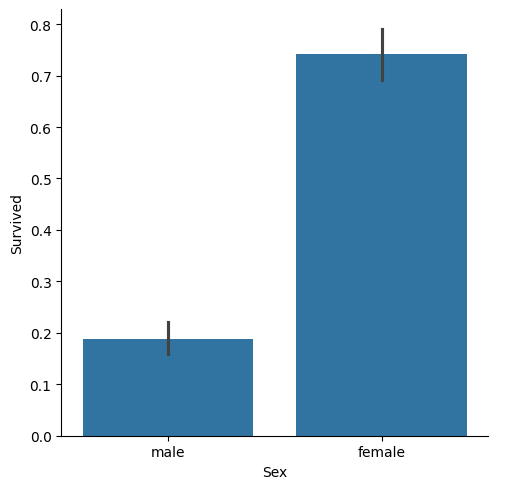

In [30]:
sns.catplot(x='Sex', y='Survived', data=df_titanic, kind='bar')

객실등급에 따른 생존율을 비교해보세요.
1등급 : 생존율
2등급 : 생존율
3등급 : 생존율

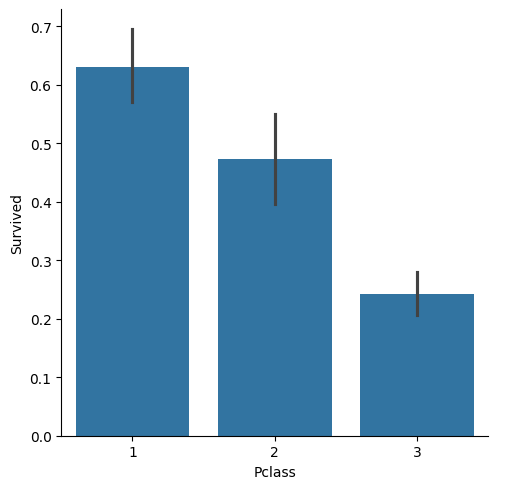

In [31]:
sns.catplot(x='Pclass', y='Survived', data=df_titanic, kind='bar')

하나의 그래프에 객실등급과 성별에 대한 생존율을 함께 시각화해보세요.

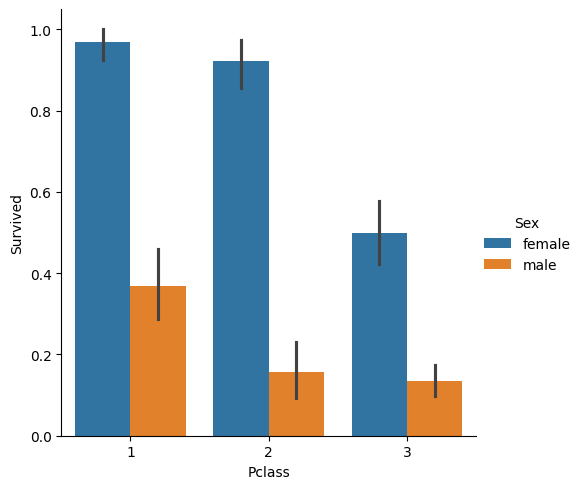

In [32]:
g = sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_titanic, kind='bar')

성별에 따른 나이의 분포를 분석해보세요.
객실등급에 따른 나이의 분포를 분석해보세요.

In [33]:
df_titanic[['Age', 'Sex']].groupby(['Sex']).mean()

,Age
Sex,
female,27.915709
male,30.726645


In [34]:
df_titanic[['Age', 'Pclass']].groupby(['Pclass']).mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


c:\Users\USER\anaconda3\envs\study\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\USER\anaconda3\envs\study\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\USER\anaconda3\envs\study\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


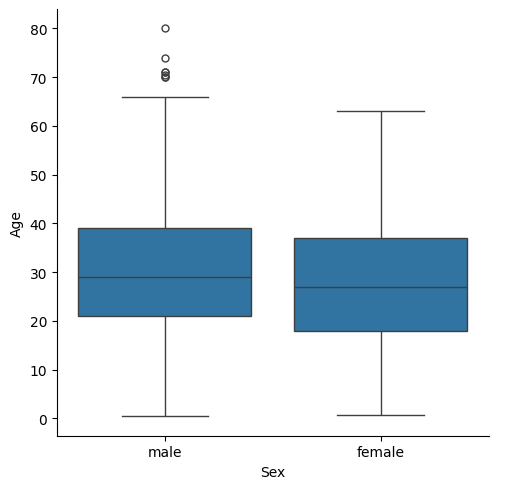

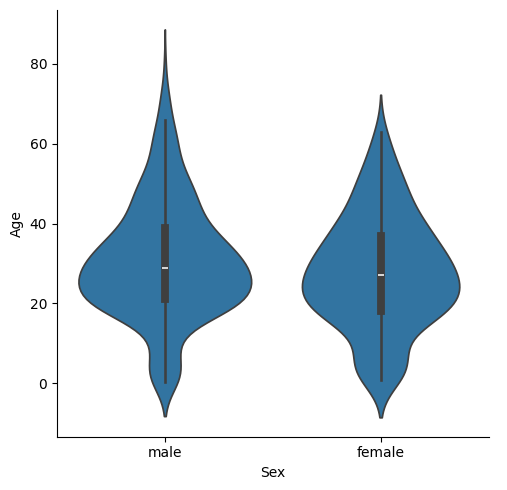

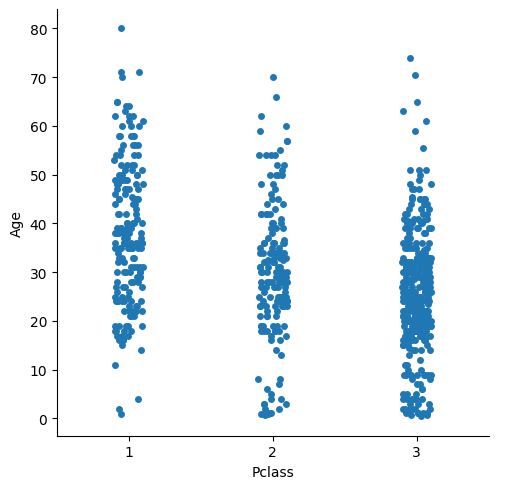

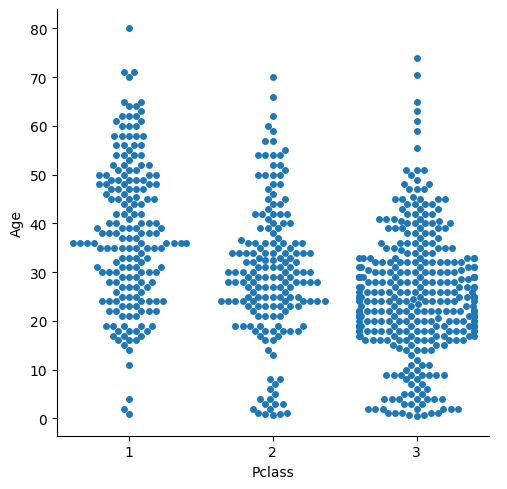

In [35]:
sns.catplot(x='Sex', y='Age', data=df_titanic, kind='box')
sns.catplot(x='Sex', y='Age', data=df_titanic, kind='violin')
sns.catplot(x='Pclass', y='Age', data=df_titanic, kind='strip')
sns.catplot(x='Pclass', y='Age', data=df_titanic, kind='swarm')

항구에 따른 생존율을 시각화해보세요.

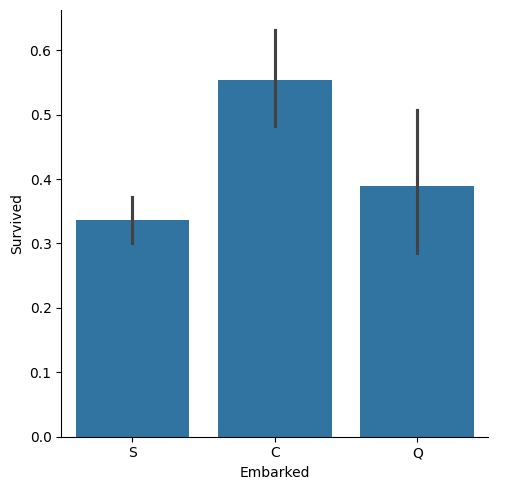

In [36]:
sns.catplot(x='Embarked', y='Survived', data=df_titanic, kind='bar')

항구에 따라 생존율의 차이가 있습니다.
왜일까?
항구에 따라 탑승하는 객실등급 수준의 차이가 있는건 아닐까.. Hoxy..?



In [37]:
df_titanic[['Pclass', 'Embarked']].groupby(['Embarked']).mean()

,Pclass
Embarked,
C,1.886905
Q,2.909091
S,2.350932


In [38]:
count_em_pc = df_titanic[['Pclass', 'Embarked', 'PassengerId']].groupby(['Embarked', 'Pclass']).count()
count_em_pc

PassengerId
Embarked Pclass             
C        1                85
         2                17
         3                66
Q        1                 2
         2                 3
         3                72
S        1               127
         2               164
         3               353

  count plot을 이용해서 표현해보자.

C:\Users\USER\AppData\Local\Temp\ipykernel_1552\1408359043.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="Pclass", col="Embarked",  data=df_titanic,


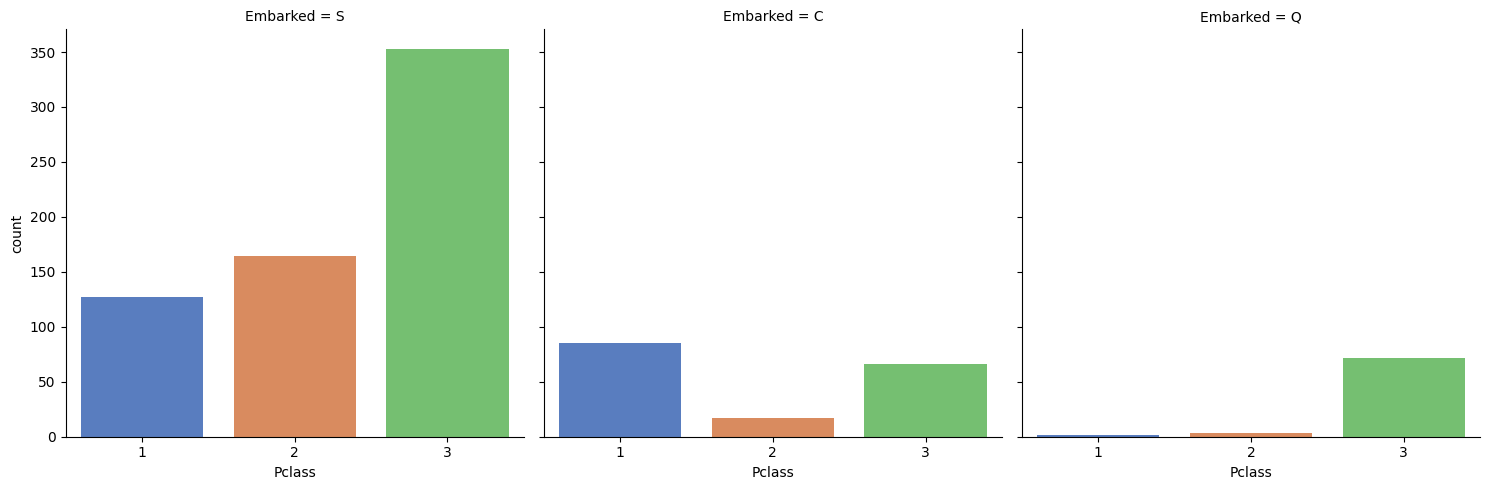

In [39]:
sns.catplot(x="Pclass", col="Embarked",  data=df_titanic,
                   kind="count", palette="muted")

항구와 객실등급에 따른 생존율

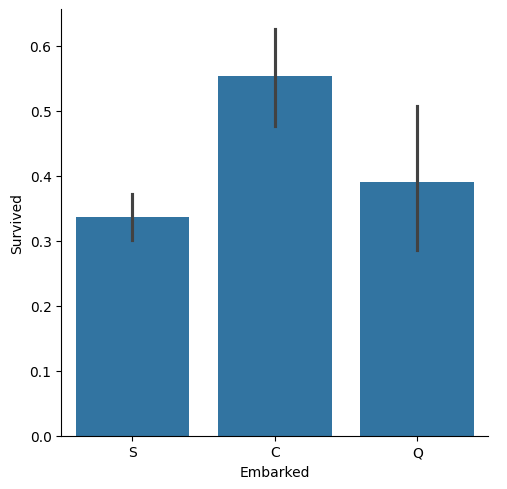

In [40]:
g = sns.catplot(x='Embarked', y='Survived', data=df_titanic, kind='bar',
                   aspect=1)

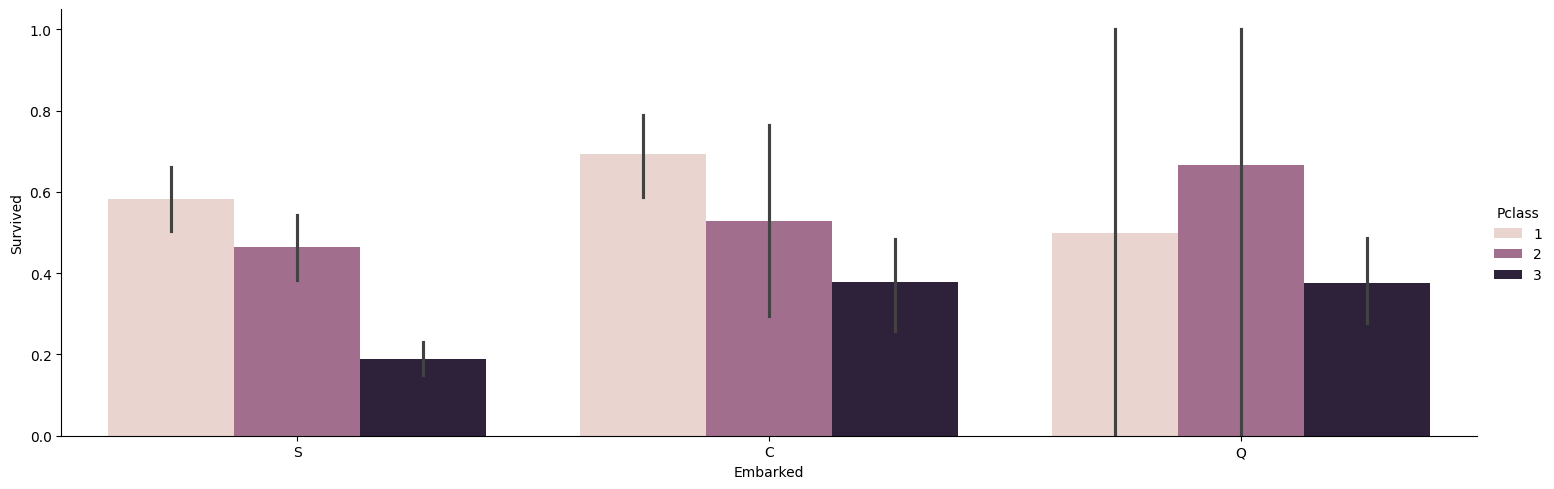

In [41]:
g = sns.catplot(x='Embarked', y='Survived', hue='Pclass', data=df_titanic, kind='bar',
                   aspect=3)

요금의 분포를 시각화해보세요.

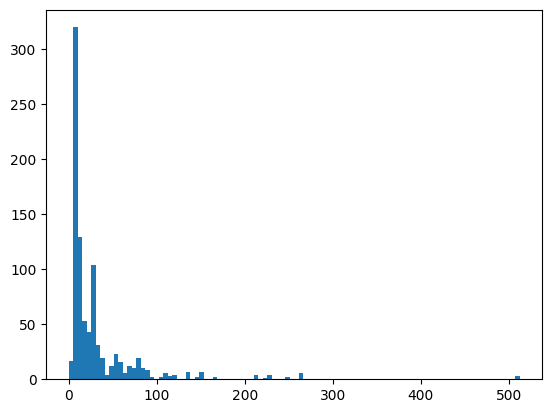

In [42]:
plt.hist(df_titanic["Fare"], bins=100)
plt.show()

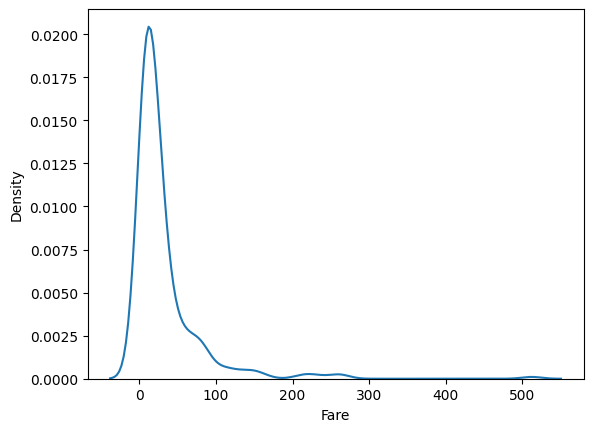

In [43]:
g = sns.kdeplot(df_titanic["Fare"])

In [44]:
df_titanic["Fare"].skew()

np.float64(4.787316519674893)

skewness는 -2 이하, 2 이상이 기준

치우침(Skewness)가 가장 심한 feature가 무엇인지 찾아보세요.

In [51]:
numeric_columns = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [52]:
skew = df_titanic[numeric_columns].skew().sort_values(ascending=False) #.drop(['PassengerId'])

In [53]:
df_skew = pd.DataFrame(skew,
                       columns=['skew'])
df_skew

,skew
Fare,4.787317
SibSp,3.695352
Parch,2.749117
Survived,0.478523
Age,0.389108
PassengerId,0.000000
Pclass,-0.630548


In [54]:
df_skew['feature'] = df_skew.index
df_skew

,skew,feature
Fare,4.787317,Fare
SibSp,3.695352,SibSp
Parch,2.749117,Parch
Survived,0.478523,Survived
Age,0.389108,Age
PassengerId,0.000000,PassengerId
Pclass,-0.630548,Pclass


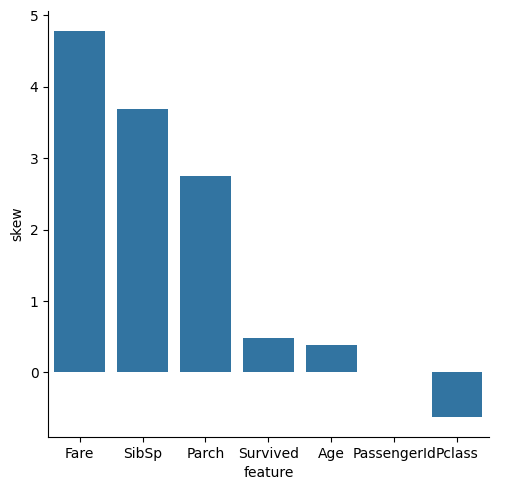

In [55]:
sns.catplot(x='feature', y='skew', data=df_skew, kind='bar')

첨도(Kurtosis)가 가장 심한 feature가 무엇인지 찾아보세요.

In [ ]:
df_titanic.kurt().sort_values(ascending=False)

In [68]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
df_titanic[['Name', 'Ticket', 'Cabin']].describe()

,Name,Ticket,Cabin
count,891,891,204
unique,891,681,147
top,"Braund, Mr. Owen Harris",347082,G6
freq,1,7,4


Name, Ticket, Cabin은 모두 unique값이 많기 때문에, 데이터 자체값으로는 큰의미가 없다. 데이터를 직접 살펴보고, 유의미한 value를 추출할 수 있을지 고민해야한다.

In [58]:
df_titanic['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [59]:
df_titanic.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

전체 이름에서, . 앞에 있는 알파벳묶음열(알파벳으로만 이루어진 문자열)을 찾아내고 싶다면?

In [ ]:
# .
# ?
# +
# *
# []
# [^]
# ()

# 회피용법 \. \? \+ \* \[ \] \^ \( \)

# greedy Q : 최대한 긴 문자열로 찾아낸다. = .+
# reluctant Q : 최대한 짧은 문자열로 찾아낸다. = .+?




In [60]:
df_titanic['Title'] = df_titanic.Name.str.extract('([A-Za-z]+)\.', expand=True) # 정규표현식 7가지 핵심 문법 ? . + * [] [^] ()

In [61]:
import re
text = 'abc.def..ght..xyz.poi'
rq = re.findall('\.(.+?)\.', text)
gq = re.findall('\.(.+)\.', text)
rq, gq

(['def', 'ght', 'xyz'], ['def..ght..xyz'])

In [62]:
df_titanic['Title'] = df_titanic.Name.str.extract(',\s(.+?)\.', expand=True) # .+? = 문자열

In [63]:
df_titanic['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [64]:
pd.crosstab(df_titanic['Title'], df_titanic['Sex'])


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [65]:
list(df_titanic)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Title']

In [66]:
pd.crosstab(df_titanic['Title'], df_titanic['Pclass'])


Pclass,1,2,3
Title,,,
Capt,1,0,0
Col,2,0,0
Don,1,0,0
Dr,5,2,0
Jonkheer,1,0,0
Lady,1,0,0
Major,2,0,0
Master,3,9,28
Miss,46,34,102


In [67]:
pd.crosstab(df_titanic['Title'], df_titanic['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23
Miss,55,127


In [68]:
df_titanic['Name'].str.split(',')

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
                             ...                        
886                             [Montvila,  Rev. Juozas]
887                      [Graham,  Miss. Margaret Edith]
888          [Johnston,  Miss. Catherine Helen "Carrie"]
889                             [Behr,  Mr. Karl Howell]
890                               [Dooley,  Mr. Patrick]
Name: Name, Length: 891, dtype: object

이름에서 Mr, Miss 등 성별 혹은 직위를 나타내는 칭호가 있다. 이것은 생존율에 쓸만하지 않을까?

  이녀석만 따로 빼내자.

In [69]:
[i.split(",")[1] for i in df_titanic["Name"]]

[' Mr. Owen Harris',
 ' Mrs. John Bradley (Florence Briggs Thayer)',
 ' Miss. Laina',
 ' Mrs. Jacques Heath (Lily May Peel)',
 ' Mr. William Henry',
 ' Mr. James',
 ' Mr. Timothy J',
 ' Master. Gosta Leonard',
 ' Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
 ' Mrs. Nicholas (Adele Achem)',
 ' Miss. Marguerite Rut',
 ' Miss. Elizabeth',
 ' Mr. William Henry',
 ' Mr. Anders Johan',
 ' Miss. Hulda Amanda Adolfina',
 ' Mrs. (Mary D Kingcome) ',
 ' Master. Eugene',
 ' Mr. Charles Eugene',
 ' Mrs. Julius (Emelia Maria Vandemoortele)',
 ' Mrs. Fatima',
 ' Mr. Joseph J',
 ' Mr. Lawrence',
 ' Miss. Anna "Annie"',
 ' Mr. William Thompson',
 ' Miss. Torborg Danira',
 ' Mrs. Carl Oscar (Selma Augusta Emilia Johansson)',
 ' Mr. Farred Chehab',
 ' Mr. Charles Alexander',
 ' Miss. Ellen "Nellie"',
 ' Mr. Lalio',
 ' Don. Manuel E',
 ' Mrs. William Augustus (Marie Eugenie)',
 ' Miss. Mary Agatha',
 ' Mr. Edward H',
 ' Mr. Edgar Joseph',
 ' Mr. Alexander Oskar',
 ' Mr. Hanna',
 ' Mr. Ernest Charles',
 ' M

In [70]:
title = [i.split(",")[1].split(".")[0].strip() for i in df_titanic["Name"]]
df_titanic["Title"] = pd.Series(title)
df_titanic["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

Title에 따른 생존율을 비교해보세요.

In [71]:
df_titanic[['Survived', 'Title']].groupby(['Title']).mean()

,Survived
Title,
Capt,0.000000
Col,0.500000
Don,0.000000
Dr,0.428571
Jonkheer,0.000000
Lady,1.000000
Major,0.500000
Master,0.575000
Miss,0.697802


너무 빈도가 적은 Title은 묶어도 되지 않을까?

Mr -> 1
Miss -> 2
Mrs -> 3
Master, Dr -> 4
Rev -> 5
others -> 0

In [72]:
set([i.split(",")[1].split(".")[0] for i in df_titanic["Name"]])

{' Capt',
 ' Col',
 ' Don',
 ' Dr',
 ' Jonkheer',
 ' Lady',
 ' Major',
 ' Master',
 ' Miss',
 ' Mlle',
 ' Mme',
 ' Mr',
 ' Mrs',
 ' Ms',
 ' Rev',
 ' Sir',
 ' the Countess'}

In [73]:
[i.split(",")[1].split(".")[0] for i in df_titanic["Name"]]

[' Mr',
 ' Mrs',
 ' Miss',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Master',
 ' Mrs',
 ' Mrs',
 ' Miss',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mrs',
 ' Master',
 ' Mr',
 ' Mrs',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Don',
 ' Mrs',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Miss',
 ' Mrs',
 ' Mrs',
 ' Mr',
 ' Miss',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mrs',
 ' Master',
 ' Mr',
 ' Mrs',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Master',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Master',
 ' Mr',
 ' Master',
 ' Mrs',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Master',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mrs',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Mr'

이와 같이, Ticket과 Cabin도 분석해보세요.

In [74]:
df_titanic['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [75]:
df_titanic['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [76]:
for cabin in df_titanic['Cabin'][df_titanic['Cabin'].notnull()]:
    print(cabin)

C85
C123
E46
G6
C103
D56
A6
C23 C25 C27
B78
D33
B30
C52
B28
C83
F33
F G73
C23 C25 C27
E31
A5
D10 D12
D26
C110
B58 B60
E101
D26
F E69
D47
C123
B86
F2
C2
E33
B19
A7
C49
F4
A32
F2
B4
B80
G6
A31
D36
D15
C93
C83
C78
D35
G6
C87
B77
E67
B94
C125
C99
C118
D7
A19
B49
D
C22 C26
C106
B58 B60
E101
C22 C26
C65
E36
C54
B57 B59 B63 B66
C7
E34
C32
D
B18
C124
C91
C2
E40
T
F2
C23 C25 C27
F33
C128
E33
D37
B35
E50
C82
B96 B98
D36
G6
C78
E10
C52
E44
B96 B98
C23 C25 C27
A34
C104
C111
C92
E38
D21
E12
E63
D
A14
B49
C93
B37
C30
D20
C22 C26
B79
C65
E25
D46
F33
B73
B18
C95
B38
B39
B22
C86
C70
A16
E67
C101
E25
E44
C68
A10
E68
B41
D20
A20
C125
F4
D19
D50
D9
A23
B50
B35
D33
A26
D48
E58
C126
B71
B51 B53 B55
D49
B5
B20
C68
F G63
C62 C64
E24
E24
C90
C124
C126
F G73
C45
E101
E8
B5
B101
D45
C46
B57 B59 B63 B66
B22
D30
E121
B77
B96 B98
D11
E77
F38
B3
B20
D6
B82 B84
D17
B96 B98
A36
E8
B102
B69
E121
B28
E49
C47
C92
D28
E17
D17
A24
D35
B51 B53 B55
C50
B42
C148


C:\Users\USER\AppData\Local\Temp\ipykernel_1552\1376004323.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="CabinCode", col="SibSp",  data=df_titanic,


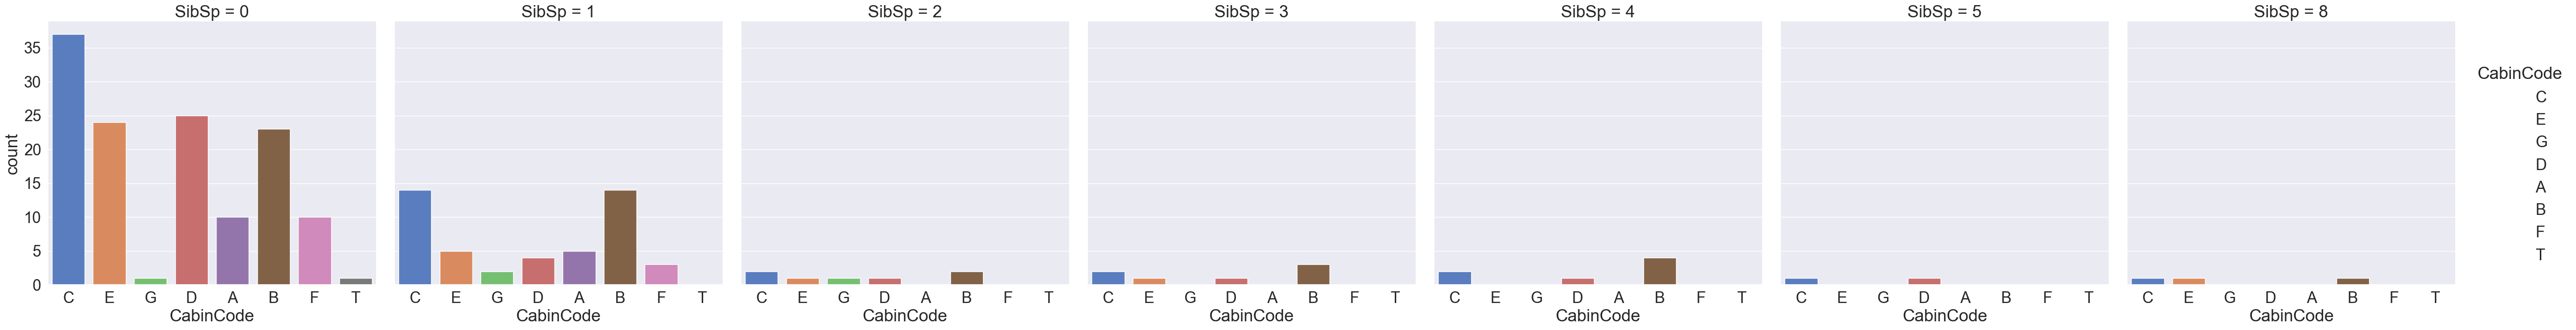

In [77]:
cabin_num = [cabin.split()[0][0] for cabin in df_titanic['Cabin'][df_titanic['Cabin'].notnull()]]
df_titanic["CabinCode"] = pd.Series(cabin_num)
sns.set(font_scale=2) # 폰트 크기 키우기
sns.catplot(x="CabinCode", col="SibSp",  data=df_titanic,
                 height=7,  kind="count", palette="muted")